In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
# !pip install pytesseract

In [15]:
import pytesseract

In [16]:
# Load the image
img = cv2.imread(r"D:\Megha\PPro\eKYC\data\adhar1.jpg")

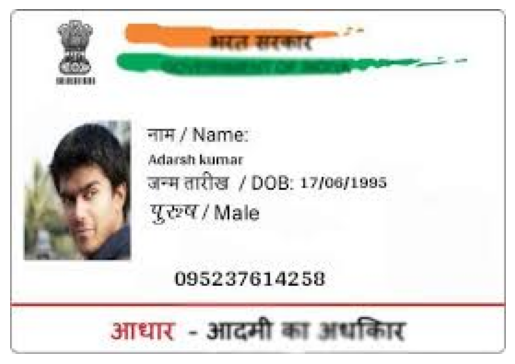

In [17]:
# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

contours (0, 1, 268, 158)
Area 41583.0


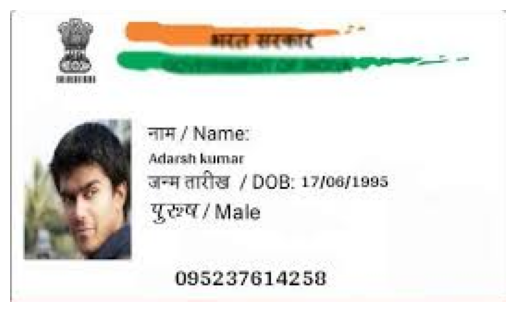

In [18]:
gray_img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred =  cv2.GaussianBlur(gray_img, (3, 3), 0)
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [19]:
cv2.imwrite(r"D:\Megha\PPro\eKYC\data\02_intermediate_data\contour_id.jpg", cv2.cvtColor(contour_id, cv2.COLOR_RGB2BGR))

True

In [20]:
gray_contour_id =  cv2.cvtColor(contour_id, cv2.COLOR_RGB2GRAY)


In [21]:
# Check if the image was loaded successfully
# if img is None:
#     print(f"Error: Unable to load image at")
# else:
#     # Convert the image to grayscale for better OCR results
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Apply thresholding to preprocess the image
#     # cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU can be replaced with other methods depending on the image
#     # _, threshold_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     # plt.imshow(threshold_img, cmap = 'gray')
#     # plt.show()

#     # Extract the text from the preprocessed image
#     # psm 6 stands for assuming a single uniform block of text.
#     custom_config = r'--oem 3 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
#     text = pytesseract.image_to_string(gray_img, config=custom_config)
    
#     # Print the extracted text to the console
#     print(text)

In [12]:
custom_config = r'--oem 3 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(gray_contour_id, config=custom_config)

print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [22]:
# Use pytesseract to detect text and its bounding boxes
data = pytesseract.image_to_data(gray_contour_id, config=custom_config, output_type=pytesseract.Output.DICT)

# Iterate through each detected text item
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # Only consider boxes with a confidence > 60
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(contour_id, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle with green color and 2 px thickness

# Display the image with bounding boxes
plt.imshow(contour_id)
plt.axis('off')
plt.show()

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [23]:
from paddleocr import PaddleOCR, draw_ocr
ocr = PaddleOCR(use_angle_cls=True, use_gpu=False)
def show_ocr(ocr, img_path, font):

    result = ocr.ocr(img_path)
    # save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')

    image = cv2.imread(img_path)

    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]

    im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

    # cv2.imwrite(save_path, im_show)

    img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img)	
    plt.axis('off')
    # return result

ModuleNotFoundError: No module named 'paddleocr'